In [1]:
%matplotlib ipympl
import numpy as np
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert

In [2]:
data = ert.load("010.dat")
print(data)

Data: Sensors: 392 data: 2849, nonzero entries: ['a', 'b', 'm', 'n', 'r', 'valid']


In [3]:
data["k"] = ert.geometricFactors(data)
data["rhoa"] = data["r"] * data["k"]
data.estimateError(relativeError=0.02, absoluteError=0.07)

Detecting small distances, using mm accuracy
Data: Sensors: 14 data: 71, nonzero entries: ['a', 'b', 'err', 'k', 'm', 'n', 'r', 'rhoa', 'valid']


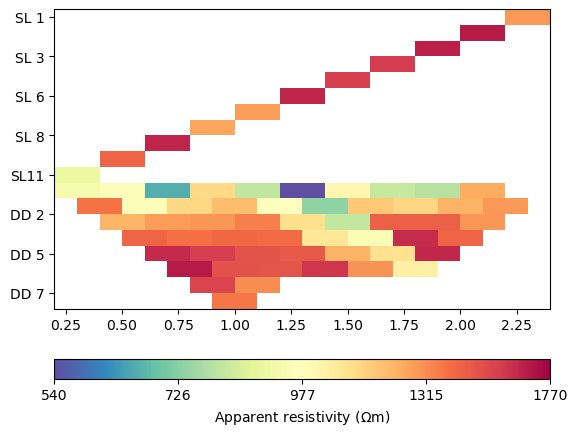

In [4]:
x0 = data.subset(x=0)
x0.setSensors(np.column_stack([pg.y(x0), pg.x(x0)])) # auto for x/y
x0.show()
print(x0)


Detecting small distances, using mm accuracy
Data: Sensors: 14 data: 139, nonzero entries: ['a', 'b', 'err', 'k', 'm', 'n', 'r', 'rhoa', 'valid', 'ya', 'yb', 'ym', 'yn']


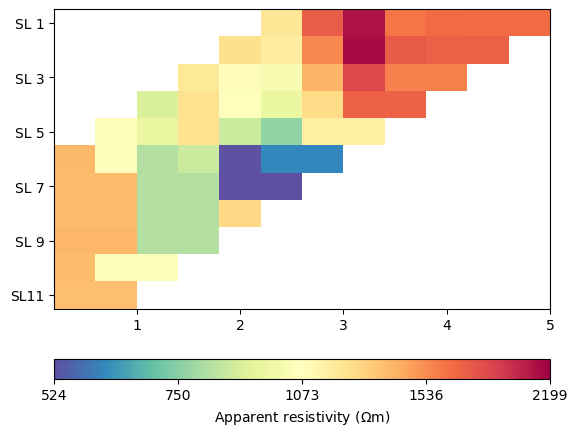

In [5]:
y1 = data.subset(y=0.6)
y1.setSensors(y1.sensors() * np.array([1, 0, 0]))  # auto
y1.show()
print(y1)

In [6]:
mgr = ert.Manager(y1)
mgr.invert(verbose=True)

18/03/24 - 15:40:04 - pyGIMLi - INFO - Found 2 regions.
18/03/24 - 15:40:04 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
18/03/24 - 15:40:04 - pyGIMLi - INFO - Found 2 regions.
18/03/24 - 15:40:04 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
18/03/24 - 15:40:04 - pyGIMLi - INFO - Creating forward mesh from region infos.
18/03/24 - 15:40:04 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
18/03/24 - 15:40:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 760 Cells: 1412 Boundaries: 1112
18/03/24 - 15:40:04 - pyGIMLi - INFO - Use median(data values)=1195.6100000000017
18/03/24 - 15:40:04 - pyGIMLi - INFO - Created startmodel from forward operator: 186, min/max=1195.610000/1195.610000
18/03/24 - 15:40:04 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000213B06841D0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000213B0684900>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000213B06EFCC0>
min/max (data): 524/2199
min/max (error): 2%/2.01%
min/max (start model): 1196/1196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  228.65
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   10.50 (dPhi = 94.98%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    0.96 (dPhi = 80.74%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.96)                   #
################################################################################


186 [1233.610294575166,...,1106.0395840213257]

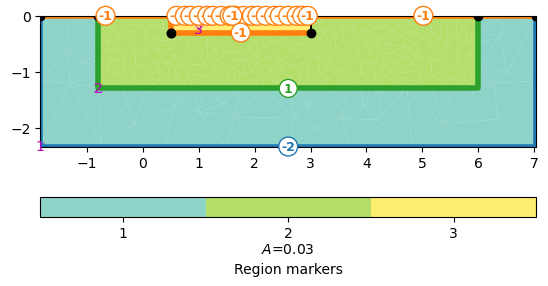

In [9]:
plc = mt.createParaMeshPLC(y1, paraDX=0.25, paraDepth=1.3, 
                           boundary=0.2, paraMaxCellSize=0.03)
cube = mt.createRectangle(start=[0.5, -0.3], end=[3, 0], 
                          marker=3, boundaryMarker=-1)
pg.show(plc+cube, markers=True);

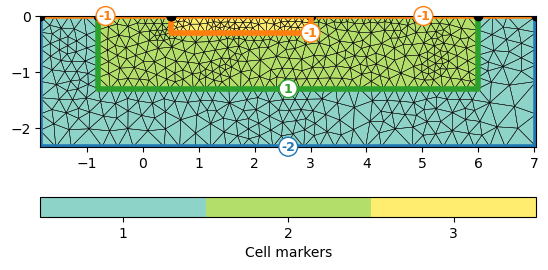

In [10]:
mesh = mt.createMesh(plc+cube, quality=34.4, smooth=True)
pg.show(mesh, markers=True, showMesh=True);

In [11]:
mgr.setMesh(mesh)

18/03/24 - 15:41:59 - pyGIMLi - INFO - Found 3 regions.
18/03/24 - 15:41:59 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


18/03/24 - 15:42:11 - pyGIMLi - INFO - Creating forward mesh from region infos.
18/03/24 - 15:42:11 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
18/03/24 - 15:42:11 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2236 Cells: 4276 Boundaries: 3304
18/03/24 - 15:42:11 - pyGIMLi - INFO - Use median(data values)=1195.6100000000017
18/03/24 - 15:42:11 - pyGIMLi - INFO - Created startmodel from forward operator: 668, min/max=1195.610000/1195.610000
18/03/24 - 15:42:11 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000213B06841D0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000213B0684900>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000213B06EFCC0>
min/max (data): 524/2199
min/max (error): 2%/2.01%
min/max (start model): 1196/1196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  232.45
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   18.87 (dPhi = 91.59%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.46 (dPhi = 88.53%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    0.78 (dPhi = 23.39%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.78)        

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x213b7ffdb80>)

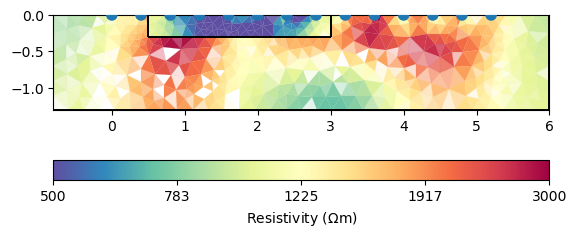

In [12]:
kw = dict(cMin=500, cMax=3000, cMap="Spectral_r", logScale=True)#,
mgr.invert()
mgr.showResult(**kw)

18/03/24 - 15:47:32 - pyGIMLi - INFO - Found 3 regions.
18/03/24 - 15:47:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
18/03/24 - 15:47:32 - pyGIMLi - INFO - Creating forward mesh from region infos.
18/03/24 - 15:47:32 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
18/03/24 - 15:47:32 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2236 Cells: 4276 Boundaries: 3304
18/03/24 - 15:47:32 - pyGIMLi - INFO - Use median(data values)=1195.6100000000017
18/03/24 - 15:47:32 - pyGIMLi - INFO - Created startmodel from forward operator: 668, min/max=1195.610000/1195.610000


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x213d5a99880>)

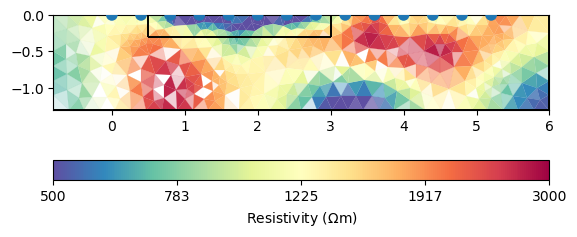

In [20]:
mgr = ert.Manager(y1)
mgr.setMesh(mesh)
mgr.inv.setRegularization(1, background=True)
mgr.inv.setRegularization(2, cType=2)#, correlationLengths=[3, 1]) # BAD!!
mgr.inv.setRegularization(3, cType=1, zWeight=0.3)
mgr.inv.setInterRegionConstraint(2, 3, 1)  # v1.5.1 shortcut
# mgr.fop.regionManager().setInterRegionConstraint(2, 3, 1)
mgr.invert()
mgr.showModel(**kw)
# mgr.showModel(**kw, coverage=mgr.coverage()[mgr.paraDomain.cellMarkers()])